In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycaret as pc
from pycaret.classification import *
from sklearn.preprocessing import RobustScaler

pd.options.display.float_format = '{:.5f}'.format

In [2]:
# Load the data
data = pd.read_csv('./DATA/경진대회용 주조 공정최적화 데이터셋.csv', encoding='cp949', index_col=0)

In [3]:
# data.info()

In [4]:
# data.describe()

### line

In [5]:
# line => 모두 동일함 컬럼 제거
print(data["line"].unique())
data.drop(axis=1, columns="line", inplace=True)

['전자교반 3라인 2호기']


### name

In [6]:
# name => 모두 동일함 컬럼 제거
print(data["name"].unique())
data.drop(axis=1, columns="name", inplace=True)

['TM Carrier RH']


### mold name

In [7]:
# mold_name => 모두 동일함 컬럼 제거
print(data["mold_name"].unique())
data.drop(axis=1, columns="mold_name", inplace=True)

['TM Carrier RH-Semi-Solid DIE-06']


### time

In [8]:
# time => 년-월-일 정보
print(data["time"].unique())

['2019-01-02' '2019-01-03' '2019-01-04' '2019-01-05' '2019-01-06'
 '2019-01-07' '2019-01-08' '2019-01-09' '2019-01-10' '2019-01-11'
 '2019-01-12' '2019-01-14' '2019-01-15' '2019-01-16' '2019-01-17'
 '2019-01-18' '2019-01-19' '2019-01-20' '2019-01-21' '2019-01-22'
 '2019-01-23' '2019-01-24' '2019-01-25' '2019-01-26' '2019-01-27'
 '2019-01-28' '2019-01-29' '2019-01-30' '2019-01-31' '2019-02-01'
 '2019-02-02' '2019-02-03' '2019-02-07' '2019-02-08' '2019-02-09'
 '2019-02-10' '2019-02-11' '2019-02-12' '2019-02-13' '2019-02-14'
 '2019-02-15' '2019-02-16' '2019-02-17' '2019-02-18' '2019-02-19'
 '2019-02-20' '2019-02-21' '2019-02-22' '2019-02-23' '2019-02-24'
 '2019-02-25' '2019-02-26' '2019-02-27' '2019-02-28' '2019-03-01'
 '2019-03-02' '2019-03-03' '2019-03-04' '2019-03-05' '2019-03-06'
 '2019-03-07' '2019-03-08' '2019-03-09' '2019-03-10' '2019-03-11'
 '2019-03-12' '2019-03-13' '2019-03-14' '2019-03-15' '2019-03-16'
 '2019-03-17' '2019-03-18' '2019-03-19' '2019-03-20' '2019-03-21'
 '2019-03-

### date

In [9]:
# date => 시:분:초 시간 정보
print(data["date"].unique())

['16:45:06' '16:45:08' '16:45:58' ... '23:29:16' '23:41:19' '23:51:29']


### registration_time

In [10]:
# registration_time => time, date 컬럼 합친 등록일시
print(data[["time", "date", "registration_time"]].iloc[:3])

# time, date 중복됨 컬럼 제거
data.drop(axis=1, columns=["time", "date"], inplace=True)


# datetime으로 변환
data["registration_time"] = pd.to_datetime(data["registration_time"])

         time      date    registration_time
0  2019-01-02  16:45:06  2019-01-02 16:45:06
1  2019-01-02  16:45:08  2019-01-02 16:45:08
2  2019-01-02  16:45:58  2019-01-02 16:45:58


### count

In [11]:
# count => 일자별 제품 생산 수량
print(data["count"].unique())

[258 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 259 260
 261 262 263  73 264   1 265   2 266   3 267   4   5 268   6 269 270   7
 271   8 272   9 273  10 274  11 275  12  13 276  14 277  15 278  16 279
 280 281 282 283  17 284  18 285  19 286  20 287  21 288  22 289  23 290
  24 291  25 292  26 293  27 294  28 295  29 296  30 297  31 298 299  32
 300 301 302 303 304 305  33  34  35  36  37  38  39  40  41  42  43  44
  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62
  63  64  65  66  67  68  69  70  71  72  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 169 170 171 172
 173 174 175 176 177 178 179 180 181 182 183 184 18

In [13]:
# data[data["passorfail"]==1]["count"].hist(figsize=(10,2))
# 불량은 count 가 낮은 구간에 많이 분포 되어있음음

<Axes: >

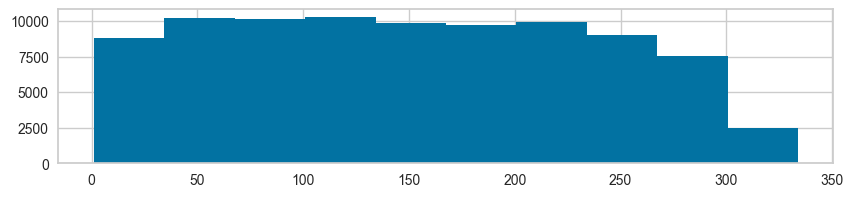

In [13]:
data[data["passorfail"]==0]["count"].hist(figsize=(10,2))

### working

In [14]:
# working => 가동여부
print(data["working"].unique())

['가동' '정지' nan]


In [15]:
pd.crosstab(index=data["passorfail"], columns=data["working"])
# 가동, 정지에 따라 불량이 특별히 나타지 않는 것으로 보임
# 정지는 어떤 경우인지 의문 => 이상탐지로 인한 정지?, 그냥 정지?

working,가동,정지
passorfail,,
0.00000,87996,2
1.00000,3967,49


In [16]:
# emergency_stop => 비상 정지
print(data["emergency_stop"].unique())
print("결측치 개수: ", data["emergency_stop"].isna().sum())
data[data["emergency_stop"].isna()]

# 대부분 컬럼이 NaN임 해당 행 제거
data.dropna(axis=0, subset="emergency_stop", inplace=True)

# emergency_stop 컬럼의 모든 값이 ON, 따라서 해당 컬럼 제거
data.drop(axis=1, columns="emergency_stop", inplace=True)

['ON' nan]
결측치 개수:  1


### molten_temp

<Axes: >

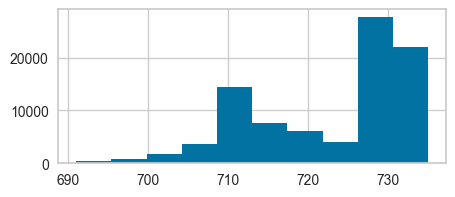

In [17]:
data[data["molten_temp"]>690]["molten_temp"].hist(figsize=(5,2))

<Axes: >

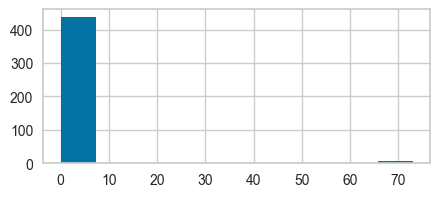

In [18]:
data[data["molten_temp"]<80]["molten_temp"].hist(figsize=(5,2))

In [19]:
# molten_temp의 고유값 확인 => 2개의 구간으로 분포가 나뉘어짐
print(sorted(data["molten_temp"].unique()))

[0.0, 7.0, 70.0, 71.0, 72.0, 73.0, 626.0, 629.0, 630.0, 632.0, 633.0, 634.0, 635.0, 636.0, 637.0, 638.0, 639.0, 640.0, 641.0, 642.0, 643.0, 644.0, 645.0, 646.0, 647.0, 648.0, 649.0, 650.0, 651.0, 652.0, 653.0, 654.0, 655.0, 656.0, 657.0, 658.0, 659.0, 660.0, 661.0, 662.0, 663.0, 664.0, 665.0, 666.0, 667.0, 668.0, 669.0, 670.0, 671.0, 672.0, 673.0, 674.0, 675.0, 676.0, 677.0, 678.0, 679.0, 680.0, 681.0, 682.0, 683.0, 684.0, 685.0, 686.0, 687.0, 688.0, 689.0, 690.0, 691.0, 692.0, 693.0, 694.0, 695.0, 696.0, 697.0, 698.0, 699.0, 700.0, 701.0, 702.0, 703.0, 704.0, 705.0, 706.0, 707.0, 708.0, 709.0, 710.0, 711.0, 712.0, 713.0, 714.0, 715.0, 716.0, 717.0, 718.0, 719.0, 720.0, 721.0, 722.0, 723.0, 724.0, 725.0, 726.0, 727.0, 728.0, 729.0, 730.0, 731.0, 732.0, 733.0, 734.0, 735.0, nan]


In [20]:
# 600을 기준으로 수치형 변수 범주화 시도
data["molten_temp_cate"] = pd.cut(x=data["molten_temp"],bins=[0,600,max(data["molten_temp"])], labels=["under600", "over600"])

In [21]:
# molten_temp에 따라서 양불 판정이 나오는 것도 아닌듯 함 => 설비 이상상황이 더 적합하지 않을까?
pd.crosstab(index=data["passorfail"], columns=data["molten_temp_cate"])

molten_temp_cate,under600,over600
passorfail,,
0.00000,9,85380
1.00000,1,3928


### facility_operation_cycleTime  

In [22]:
print(sorted(data["facility_operation_cycleTime"].unique()))

[69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 246, 248, 249, 252, 253, 254, 255, 259, 263, 268, 270, 272, 278, 296, 310, 331, 348, 457]


In [23]:
data["facility_operation_cycleTime"]

0        119
1         98
2         98
3        100
4         99
        ... 
92010    122
92011    120
92012    122
92013    133
92014    122
Name: facility_operation_cycleTime, Length: 92014, dtype: int64

<Axes: >

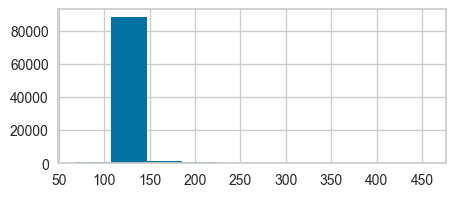

In [24]:
data["facility_operation_cycleTime"].hist(figsize=(5,2))

### cast_pressure

[41.0, 45.0, 62.0, 128.0, 129.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 186.0, 187.0, 188.0, 189.0, 190.0, 191.0, 192.0, 193.0, 194.0, 195.0, 196.0, 198.0, 199.0, 200.0, 203.0, 241.0, 260.0, 265.0, 278.0, 283.0, 299.0, 300.0, 301.0, 302.0, 303.0, 304.0, 305.0, 306.0, 307.0, 308.0, 309.0, 310.0, 311.0, 312.0, 313.0, 314.0, 315.0, 316.0, 317.0, 318.0, 319.0, 320.0, 321.0, 322.0, 323.0, 324.0, 325.0, 326.0, 327.0, 328.0, 329.0, 330.0, 331.0, 332.0, 333.0, 334.0, 335.0, 336.0, 337.0, 338.0, 339.0, 340.0, 341.0, 342.0, 343.0, 344.0, 345.0, 346.0, 347.0, 348.0]


<Axes: >

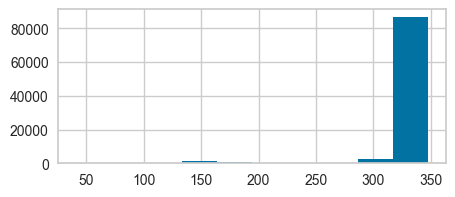

In [25]:
print(sorted(data["cast_pressure"].unique()))
data["cast_pressure"].hist(figsize=(5,2))
# data[data["cast_pressure"]>690]["cast_pressure"].hist(figsize=(5,2))
# data[data["cast_pressure"]<80]["cast_pressure"].hist(figsize=(5,2))
# pd.crosstab(index=data["passorfail"], columns=data["cast_pressure"])

### biscuit_thickness

In [27]:
print(sorted(data["biscuit_thickness"].unique()))
# data["biscuit_thickness"].hist(figsize=(5,2))
data["biscuit_thickness_cate"] = pd.cut(x=data["biscuit_thickness"],bins=[0,400,max(data["biscuit_thickness"])], labels=["under90", "over400"])
# data[data["biscuit_thickness"]>400]["biscuit_thickness"].hist(figsize=(5,2))
# data[data["biscuit_thickness"]<90]["biscuit_thickness"].hist(figsize=(5,2))
pd.crosstab(index=data["passorfail"], columns=data["biscuit_thickness_cate"])
# 400 이상에서 전부 불량

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 13.0, 15.0, 16.0, 17.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 65.0, 66.0, 67.0, 74.0, 88.0, 420.0, 422.0]


biscuit_thickness_cate,under90,over400
passorfail,,
0.00000,87998,0
1.00000,3812,203


### upper_mold_temp1

[18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172

<Axes: >

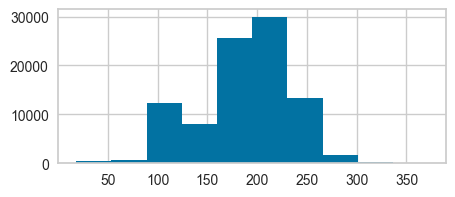

In [35]:
print(sorted(data["upper_mold_temp1"].unique()))
# data["upper_mold_temp1"].hist(figsize=(5,2))
# plt.figure(figsize=(4,5))
# sns.boxplot(data["upper_mold_temp1"])
data[data["upper_mold_temp1"]==1449]
# 데이터 분포에서 크게 벗어난 데이터 제거
data[data["upper_mold_temp1"]==1449]
data = data[data["upper_mold_temp1"]!=1449]
data["upper_mold_temp1"].hist(figsize=(5,2))

### upper_mold_temp2

[15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.

<Axes: >

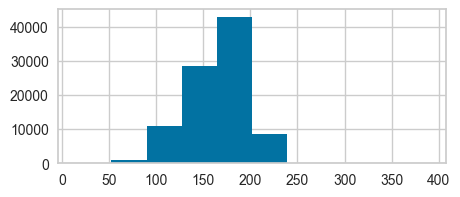

In [34]:
print(sorted(data["upper_mold_temp2"].unique()))
# data["upper_mold_temp2"].hist(figsize=(5,2))
# 데이터 분포에서 크게 벗어난 데이터 제거
data[data["upper_mold_temp2"]==4232]
data = data[data["upper_mold_temp2"]!=4232]
data["upper_mold_temp2"].hist(figsize=(5,2))

### upper_mold_temp3

[42.0, 44.0, 47.0, 52.0, 55.0, 56.0, 57.0, 58.0, 60.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 92.0, 93.0, 94.0, 95.0, 98.0, 99.0, 100.0, 102.0, 103.0, 104.0, 105.0, 108.0, 109.0, 110.0, 111.0, 118.0, 120.0, 128.0, 165.0, 166.0, 171.0, 1449.0, nan, 91.0, 96.0, 97.0, 101.0, 106.0, 107.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 119.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 164.0, 172.0, 193.0]


<Axes: >

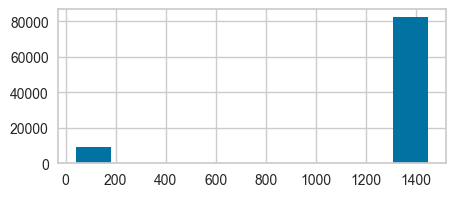

In [36]:
print(sorted(data["upper_mold_temp3"].unique()))
data["upper_mold_temp3"].hist(figsize=(5,2))

### lower_mold_temp1

[18.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 1

<Axes: >

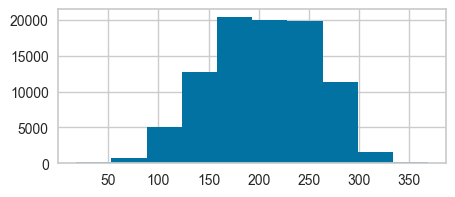

In [40]:
print(sorted(data["lower_mold_temp1"].unique()))
data["lower_mold_temp1"].hist(figsize=(5,2))
# 데이터 분포가 고름

### lower_mold_temp2

[20.0, 21.0, 22.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 35.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0

<Axes: >

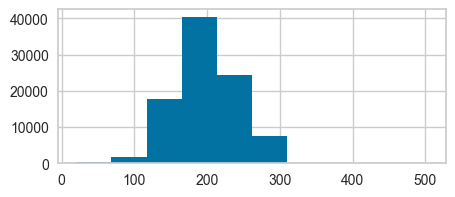

In [39]:
print(sorted(data["lower_mold_temp2"].unique()))
# 데이터 분포에서 크게 벗어난 데이터 제거
data[data["lower_mold_temp2"]==1449]
data = data[data["lower_mold_temp2"]!=1449]
data["lower_mold_temp2"].hist(figsize=(5,2))

### lower_mold_temp3

[299.0, 553.0, 904.0, 905.0, 906.0, 907.0, 909.0, 910.0, 911.0, 912.0, 913.0, 914.0, 918.0, 920.0, 921.0, 923.0, 924.0, 926.0, 927.0, 928.0, 930.0, 931.0, 932.0, 933.0, 934.0, 935.0, 938.0, 939.0, 940.0, 942.0, 944.0, 945.0, 951.0, 952.0, 954.0, 956.0, 970.0, 972.0, 974.0, 976.0, 989.0, 990.0, 1449.0, nan, 630.0, 638.0, 639.0, 640.0, 641.0, 642.0, 643.0, 644.0, 645.0, 646.0, 649.0, 650.0, 651.0, 804.0, 865.0, 869.0, 870.0, 871.0, 872.0, 873.0, 874.0, 875.0, 876.0, 877.0, 878.0, 879.0, 880.0, 881.0, 882.0, 883.0, 884.0, 885.0, 886.0, 887.0, 888.0, 890.0, 891.0, 892.0, 893.0, 894.0, 895.0, 896.0, 897.0, 898.0, 899.0, 901.0, 902.0, 950.0, 953.0, 955.0, 957.0, 958.0, 960.0, 962.0, 963.0, 965.0, 966.0, 971.0, 973.0, 975.0, 977.0, 978.0, 980.0, 982.0, 983.0, 984.0, 985.0, 986.0, 987.0, 988.0, 991.0, 992.0, 993.0, 994.0, 995.0, 996.0, 997.0, 998.0, 999.0, 1000.0, 1001.0, 1002.0, 1003.0, 1004.0, 1005.0, 1006.0, 1007.0, 1008.0, 1009.0, 1010.0, 1011.0, 1012.0, 1013.0, 1014.0, 1015.0, 1016.0, 101

<Axes: >

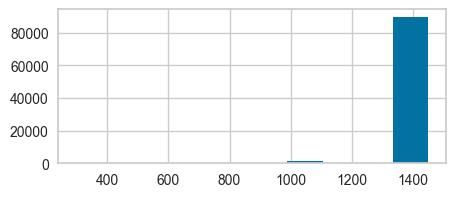

In [43]:
print(sorted(data["lower_mold_temp3"].unique()))
# 데이터 분포에서 크게 벗어난 데이터 제거
data[data["lower_mold_temp3"]==65503]
data = data[data["lower_mold_temp3"]!=65503]
data["lower_mold_temp3"].hist(figsize=(5,2))

### sleeve_temperature

<Axes: ylabel='sleeve_temperature'>

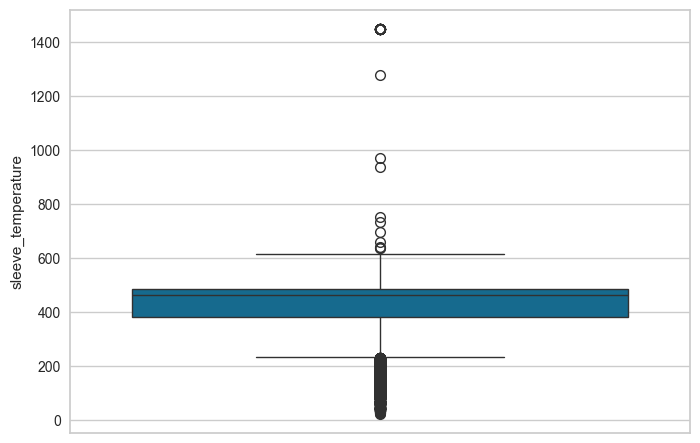

In [51]:
sns.boxplot(data["sleeve_temperature"])

[23.0, 24.0, 27.0, 28.0, 30.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0,

<Axes: >

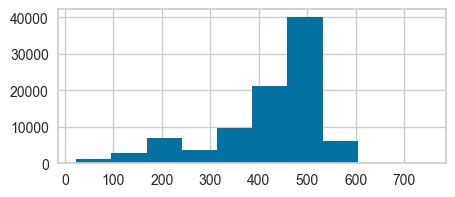

In [54]:
print(sorted(data["sleeve_temperature"].unique()))
# data["sleeve_temperature"].hist(figsize=(5,2))
# 데이터 분포에서 크게 벗어난 데이터 제거
data[data["sleeve_temperature"]==800]
data = data[data["sleeve_temperature"]<800]
data["sleeve_temperature"].hist(figsize=(5,2))

### physical_strength

[640.0, 641.0, 642.0, 643.0, 644.0, 645.0, 646.0, 647.0, 648.0, 649.0, 650.0, 651.0, 652.0, 653.0, 654.0, 655.0, 656.0, 657.0, 658.0, 659.0, 660.0, 661.0, 662.0, 663.0, 664.0, 665.0, 666.0, 667.0, 668.0, 669.0, 670.0, 671.0, 672.0, 673.0, 674.0, 675.0, 676.0, 677.0, 678.0, 679.0, 680.0, 681.0, 682.0, 683.0, 684.0, 685.0, 686.0, 687.0, 688.0, 689.0, 690.0, 691.0, 692.0, 693.0, 694.0, 695.0, 696.0, 697.0, 698.0, 699.0, 700.0, 701.0, 702.0, 703.0, 704.0, 705.0, 706.0, 707.0, 708.0, 709.0, 710.0, 711.0, 712.0, 713.0, 714.0, 715.0, 716.0, 717.0, 718.0, 719.0, 720.0, 721.0, 722.0, 723.0, 724.0, 725.0, 726.0, 727.0, 728.0, 729.0, 730.0, 731.0, 732.0, 733.0, 734.0, 735.0, 736.0, 737.0]


<Axes: >

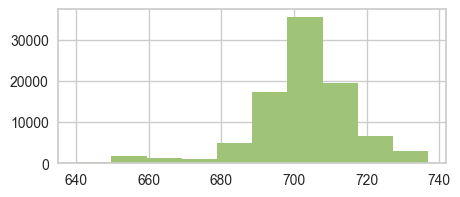

In [58]:
print(sorted(data["physical_strength"].unique()))
data["physical_strength"].hist(figsize=(5,2))
# 데이터 분포에서 크게 벗어난 데이터 제거
data[data["physical_strength"]==800]
data = data[(data["physical_strength"]<65535.0) & (data["physical_strength"]>600)]
data["physical_strength"].hist(figsize=(5,2))

### Coolant_temperature

[16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 1449.0]


<Axes: >

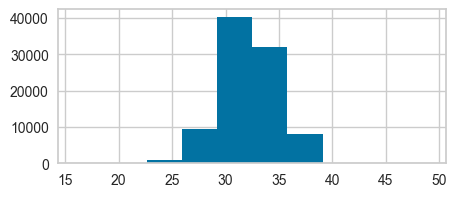

In [60]:
print(sorted(data["Coolant_temperature"].unique()))
# data["Coolant_temperature"].hist(figsize=(5,2))
# 데이터 분포에서 크게 벗어난 데이터 제거
data[data["Coolant_temperature"]==800]
data = data[data["Coolant_temperature"]<1449.0]
data["Coolant_temperature"].hist(figsize=(5,2))

### EMS_operation_time

['0', '23', '3', '6']


<Axes: >

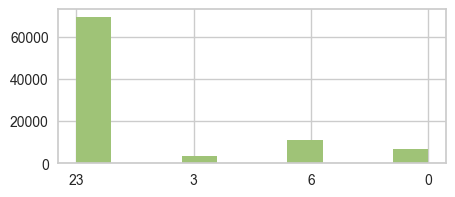

In [63]:
print(sorted(data["EMS_operation_time"].unique()))
data["EMS_operation_time"].hist(figsize=(5,2))
# 범주형으로 수정
data["EMS_operation_time"] = data["EMS_operation_time"].astype(str)
data["EMS_operation_time"].hist(figsize=(5,2))

### tryshot_signal

In [72]:
print(data["tryshot_signal"].unique())
pd.crosstab(index=data["passorfail"], columns=data["tryshot_signal"])
# data["tryshot_signal"].hist(figsize=(5,2))
# D인 경우 모두 불량

[nan 'D']


tryshot_signal,D
passorfail,
1.00000,1837


['8412', '8413', '8573', '8576', '8600', '8722', '8917']


<Axes: >

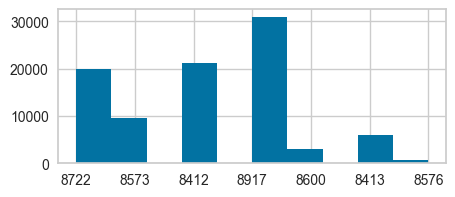

In [75]:
print(sorted(data["mold_code"].unique()))
# data["mold_code"].hist(figsize=(5,2))
# 범주형으로 수정
data["mold_code"] = data["mold_code"].astype(str)
data["mold_code"].hist(figsize=(5,2))

[nan 'A' 'B']


<Axes: >

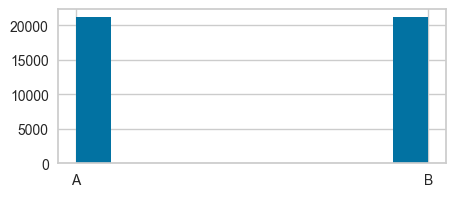

In [80]:
print(data["heating_furnace"].unique())
data["heating_furnace"].hist(figsize=(5,2))

In [83]:
data.to_csv("remove_outlier_dataset.csv", encoding="utf-8")